# Data Exploration

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
sns.set(style="whitegrid")

In [2]:
# graphing data
df = pd.read_csv('data/football_data.csv')
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,Season
0,13/08/05,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,M Riley,...,7.0,8.0,0.0,2.0,0.0,0.0,2.30,3.25,3.00,2005
1,13/08/05,Everton,Man United,0.0,2.0,A,0.0,1.0,A,G Poll,...,8.0,6.0,3.0,1.0,0.0,0.0,5.00,3.40,1.72,2005
2,13/08/05,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,R Styles,...,6.0,6.0,1.0,2.0,0.0,0.0,2.37,3.25,2.87,2005
3,13/08/05,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,C Foy,...,3.0,6.0,2.0,3.0,0.0,0.0,1.72,3.40,5.00,2005
4,13/08/05,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,M Halsey,...,5.0,0.0,2.0,3.0,1.0,0.0,2.87,3.20,2.40,2005


In [3]:
df.shape

(6961, 26)

In [4]:
# Create Home Win, Draw Win and Away Win columns
df = df.assign(homeWin=lambda df: df.apply(lambda row: 1 if row.FTHG > row.FTAG else 0, axis='columns'),
              draw=lambda df: df.apply(lambda row: 1 if row.FTHG == row.FTAG else 0, axis='columns'),
              awayWin=lambda df: df.apply(lambda row: 1 if row.FTHG < row.FTAG else 0, axis='columns'))

In [5]:
# lower case all column names
df.columns = [x.lower() for x in df.columns]
df.columns

Index(['date', 'hometeam', 'awayteam', 'fthg', 'ftag', 'ftr', 'hthg', 'htag',
       'htr', 'referee', 'hs', 'as', 'hst', 'ast', 'hf', 'af', 'hc', 'ac',
       'hy', 'ay', 'hr', 'ar', 'b365h', 'b365d', 'b365a', 'season', 'homewin',
       'draw', 'awaywin'],
      dtype='object')

In [6]:
# checking win rates for each season
win_rates = \
(df[['homewin', 'draw', 'awaywin']]
    .astype(float)
    .groupby(df['season'])
    .mean())

win_rates

,homewin,draw,awaywin
season,,,
2005,0.505263,0.202632,0.292105
2006,0.478947,0.257895,0.263158
2007,0.463158,0.263158,0.273684
2008,0.455263,0.255263,0.289474
2009,0.507895,0.252632,0.239474
2010,0.471053,0.292105,0.236842
2011,0.450000,0.244737,0.305263
2012,0.436842,0.284211,0.278947
2013,0.471053,0.205263,0.323684


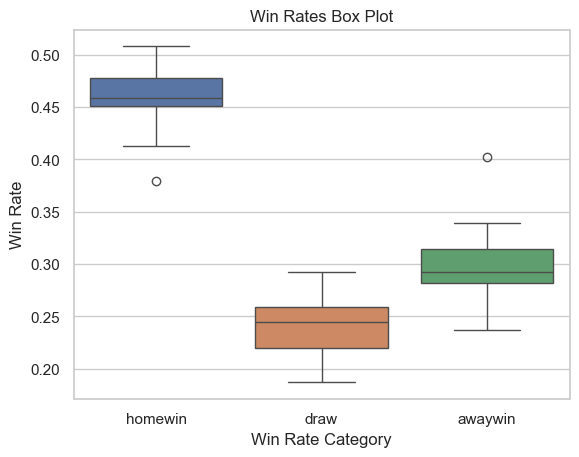

In [7]:
#

# Set the style


# Create a box plot for each win rate category
sns.boxplot(data=win_rates)

# Set the labels and title
plt.xlabel("Win Rate Category")
plt.ylabel("Win Rate")
plt.title("Win Rates Box Plot")

# Show the plot
plt.show()

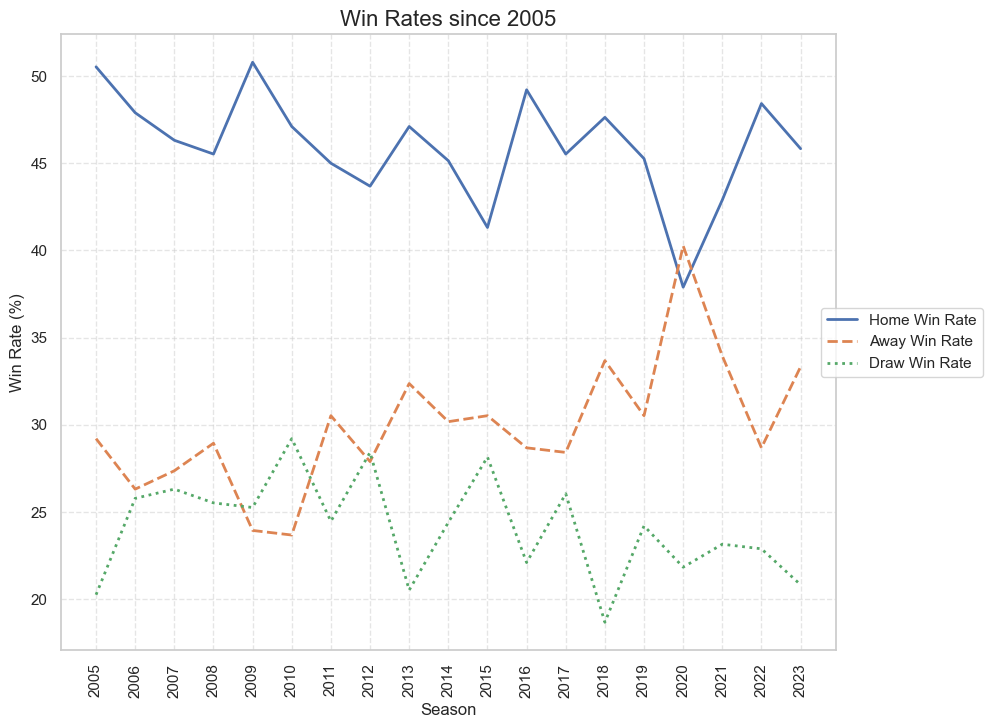

In [8]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

# Plot the lines with custom line styles
home_line = ax.plot(win_rates.index.astype(int), win_rates['homewin']*100, label='Home Win Rate', linestyle='-', linewidth=2)
away_line = ax.plot(win_rates.index.astype(int), win_rates['awaywin']*100, label='Away Win Rate', linestyle='--', linewidth=2)
draw_line = ax.plot(win_rates.index.astype(int), win_rates['draw']*100, label='Draw Win Rate', linestyle=':', linewidth=2)

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.5)

# Set the x-axis and y-axis labels
ax.set_xlabel("Season")
ax.set_ylabel("Win Rate (%)")

# Set the title and font size
plt.title("Win Rates since 2005", fontsize=16)

# Customize the legend
legend_handles = home_line + away_line + draw_line
legend_labels = [handle.get_label() for handle in legend_handles]
plt.legend(legend_handles, legend_labels, loc='center right', bbox_to_anchor=(1.2, 0.5))

# Format x-axis labels as integers and rotate them
plt.xticks(win_rates.index.astype(int), rotation=90)

# Show the plot
plt.show()

In [9]:
df.head()

,date,hometeam,awayteam,fthg,ftag,ftr,hthg,htag,htr,referee,...,ay,hr,ar,b365h,b365d,b365a,season,homewin,draw,awaywin
0,13/08/05,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,M Riley,...,2.0,0.0,0.0,2.30,3.25,3.00,2005,0,1,0
1,13/08/05,Everton,Man United,0.0,2.0,A,0.0,1.0,A,G Poll,...,1.0,0.0,0.0,5.00,3.40,1.72,2005,0,0,1
2,13/08/05,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,R Styles,...,2.0,0.0,0.0,2.37,3.25,2.87,2005,0,1,0
3,13/08/05,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,C Foy,...,3.0,0.0,0.0,1.72,3.40,5.00,2005,0,1,0
4,13/08/05,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,M Halsey,...,3.0,1.0,0.0,2.87,3.20,2.40,2005,0,1,0


In [10]:
# how many numeric columms do we have?
df.select_dtypes(include=['int64', 'float64']).columns

Index(['fthg', 'ftag', 'hthg', 'htag', 'hs', 'as', 'hst', 'ast', 'hf', 'af',
       'hc', 'ac', 'hy', 'ay', 'hr', 'ar', 'b365h', 'b365d', 'b365a', 'season',
       'homewin', 'draw', 'awaywin'],
      dtype='object')

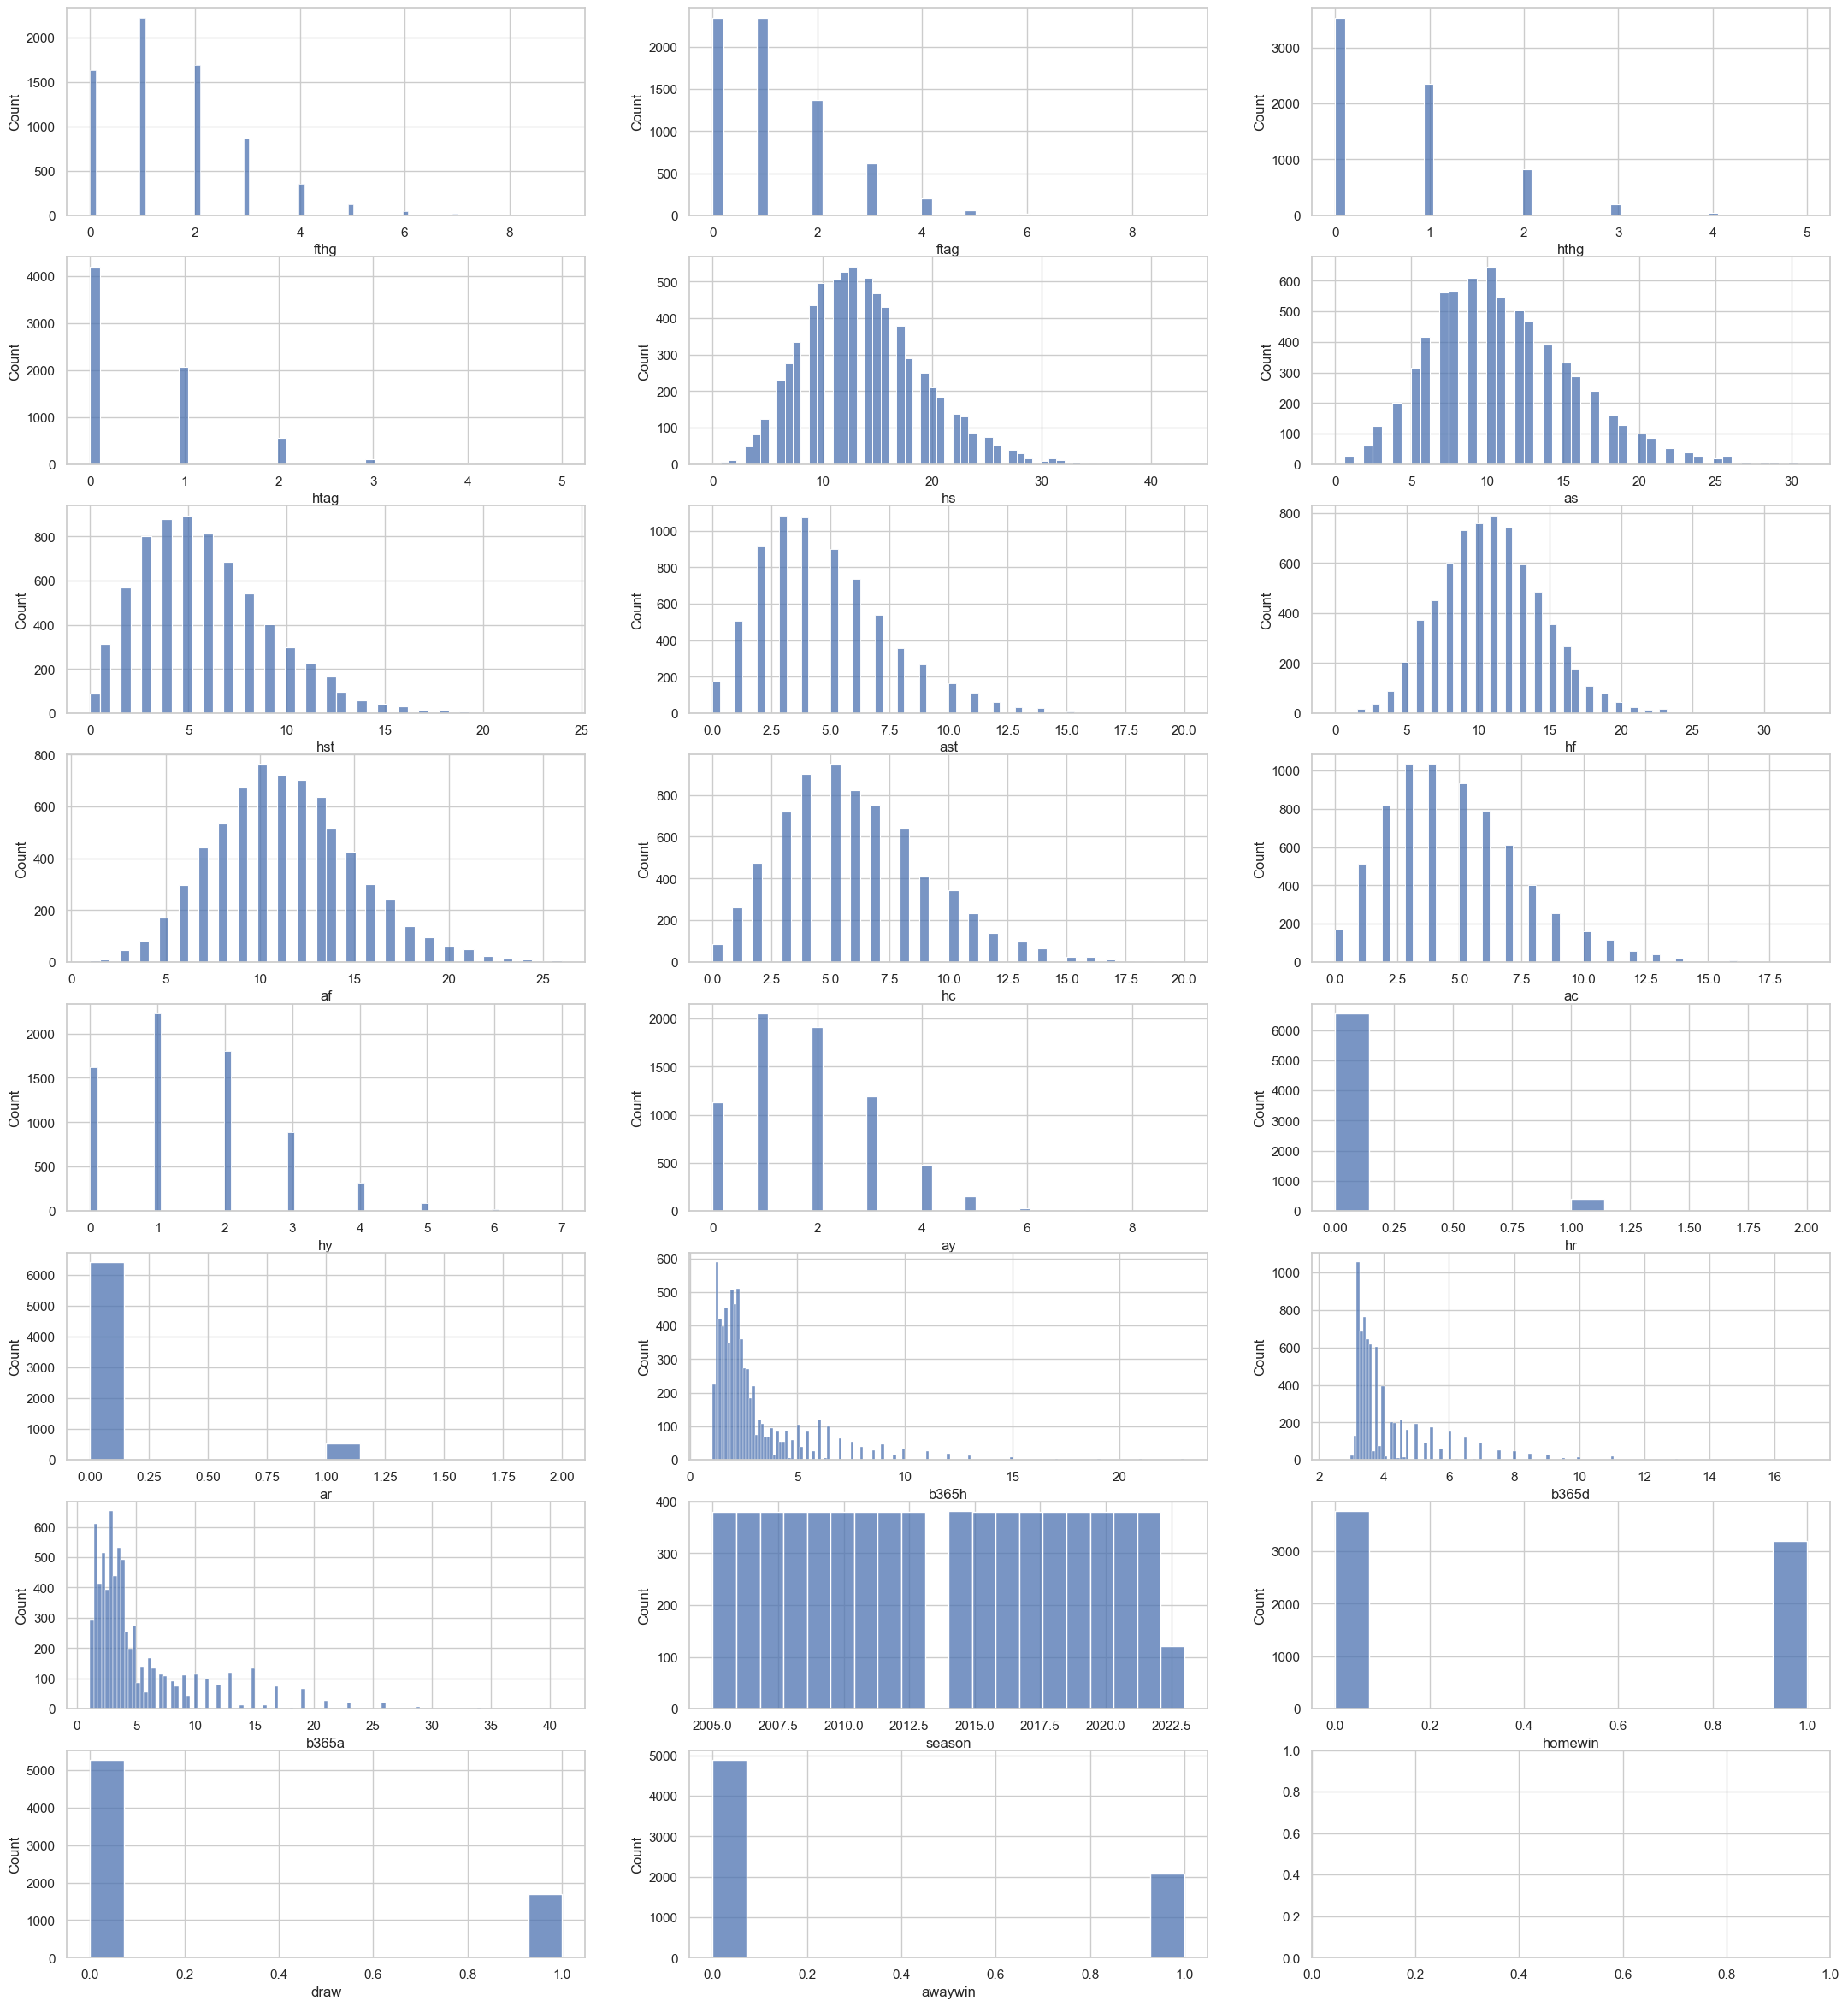

In [11]:
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=3, nrows=8, figsize=(15, 20))
plt.subplots_adjust(right=1.5, top=1.25)

# Plot all histograms
for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns, 1):
    plt.subplot(8, 3, i)
    sns.histplot(df[column])
    plt.xlabel(column)
    
plt.show()

## Exploring Referee Home Ground Bias

### What may be of interest is whether certain referees are correlated with the home team winning more often. Let's explore referee home ground bias for referees for the top 10 Referees based on games.

In [12]:
print('Overall Home Win Rate: {:.4}%'.format(df['homewin'].mean() * 100))

# Get the top 10 refs based on games
top_10_refs = df['referee'].value_counts().head(10).index

df[df['referee'].isin(top_10_refs)].groupby('referee')['homewin'].mean().sort_values(ascending=False)

Overall Home Win Rate: 45.96%


referee
L Mason          0.501742
M Clattenburg    0.478261
M Atkinson       0.460526
J Moss           0.459854
H Webb           0.458647
M Oliver         0.456825
K Friend         0.455882
M Dean           0.439076
A Taylor         0.435028
A Marriner       0.422680
Name: homewin, dtype: float64

### Variable Correlation With Margin

#### Let's now explore different variables' relationships with margin. First, we'll create a margin column, then we will pick a few different variables to look at the correlations amongst each other, using a correlation heatmap

In [13]:
df['margin'] = df['fthg'] - df['ftag']

In [14]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['fthg', 'ftag', 'hthg', 'htag', 'hs', 'as', 'hst', 'ast', 'hf', 'af',
       'hc', 'ac', 'hy', 'ay', 'hr', 'ar', 'b365h', 'b365d', 'b365a', 'season',
       'homewin', 'draw', 'awaywin', 'margin'],
      dtype='object')

In [15]:
stat_cols = ['hs', 'as', 'hst', 'ast', 'hf', 'af','hc', 'ac', 'hy', 'ay', 'hr', 'ar', 'margin']

stat_correlations = df[stat_cols].corr()
stat_correlations['margin'].sort_values()

ast      -0.370625
as       -0.318459
hy       -0.147848
hr       -0.130525
ac       -0.085599
hf       -0.054605
af        0.005168
ay        0.015807
hc        0.085160
ar        0.102702
hs        0.295948
hst       0.398677
margin    1.000000
Name: margin, dtype: float64

<Axes: >

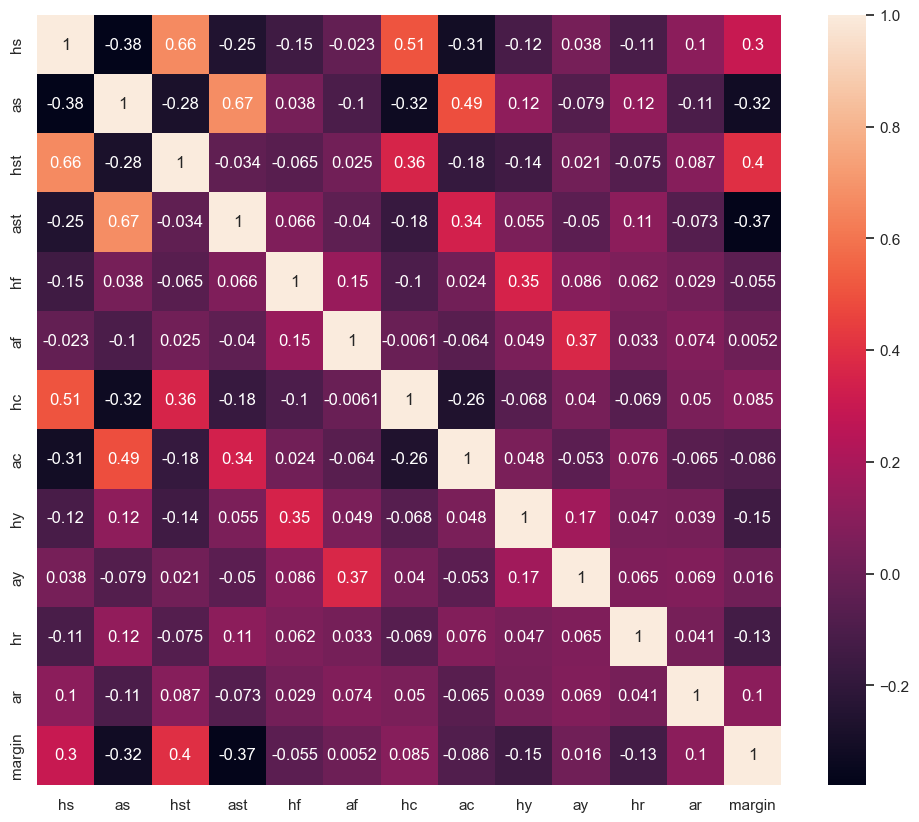

In [16]:
# Create a figure with a larger size
fig, axes = plt.subplots(figsize=(12, 10))

# Plot the heatmap with larger correlation numbers
sns.heatmap(stat_correlations, annot=True, annot_kws={'size': 12})

# To do possibilities

 - use more preditors
 - use other ML algoritm
 - more championships
 - time series analysis - seasonal effects ?
 - add odds to data from football data
 - back testing strategies with odds